In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from h5py import File
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [54]:
epochs = 10
batch_size = 32

In [55]:
with File('train_catvnoncat.h5', 'r') as hdf_file:
  train_images = hdf_file['train_set_x'][:]
  train_labels = hdf_file['train_set_y'][:]

In [56]:
with File('test_catvnoncat.h5', 'r') as hdf_file:
  test_images = hdf_file['test_set_x'][:]
  test_labels = hdf_file['test_set_y'][:]

In [57]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [58]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [59]:
train_images = train_images.reshape(-1, train_images.shape[1], train_images.shape[1], 3)
test_images = test_images.reshape(-1, test_images.shape[1], test_images.shape[1], 3)

In [60]:
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/10


7/7 [==============================] - 1s 29ms/step - loss: 0.6825 - accuracy: 0.6555
Epoch 2/10
7/7 [==============================] - 0s 31ms/step - loss: 0.6578 - accuracy: 0.6555
Epoch 3/10
7/7 [==============================] - 0s 30ms/step - loss: 0.6564 - accuracy: 0.6555
Epoch 4/10
7/7 [==============================] - 0s 30ms/step - loss: 0.6450 - accuracy: 0.6555
Epoch 5/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6465 - accuracy: 0.6555
Epoch 6/10
7/7 [==============================] - 0s 29ms/step - loss: 0.6451 - accuracy: 0.6555
Epoch 7/10
7/7 [==============================] - 0s 30ms/step - loss: 0.6439 - accuracy: 0.6555
Epoch 8/10
7/7 [==============================] - 0s 29ms/step - loss: 0.6513 - accuracy: 0.6555
Epoch 9/10
7/7 [==============================] - 0s 34ms/step - loss: 0.6431 - accuracy: 0.6555
Epoch 10/10
7/7 [==============================] - 0s 29ms/step - loss: 0.6476 - accuracy: 0.6555


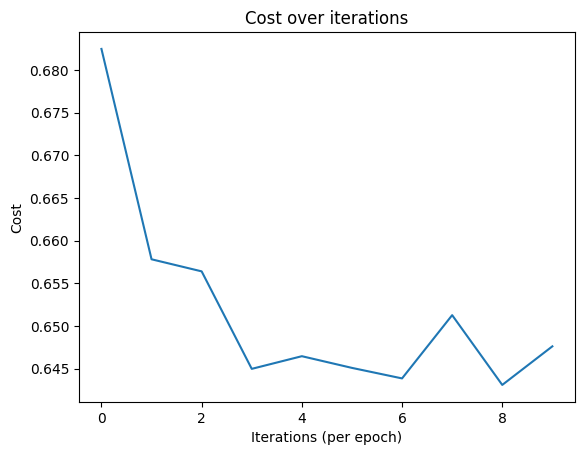

In [63]:
costs = np.squeeze(history.history['loss'])
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per epoch)')
plt.title("Cost over iterations")
plt.show()

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 16ms/step - loss: 0.8283 - accuracy: 0.3400
Test accuracy: 0.3400000035762787


In [65]:
new_image_path = 'cat.jpg'
new_image = image.load_img(new_image_path, target_size=(train_images.shape[1], train_images.shape[2]))

In [66]:
def preprocess_image(img):
  img_array = image.img_to_array(img)
  img_array = img_array / 255
  return np.expand_dims(img_array, axis=0)

In [67]:
new_image = preprocess_image(new_image)

In [68]:
prediction = model.predict(new_image)
predicted_class = 1 if prediction[0][0] > 0.5 else 0
print('Predicted class:', ('Cat' if predicted_class == 1 else 'Non-Cat'))

1/1 [==============================] - 0s 89ms/step
Predicted class: Non-Cat
